In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Datasets/Daily Sales-Oct'23 to Sep'24.xlsx")

In [3]:
df.head()

,Date,Revnue(Rs.)
0,2023-10-01,7675.03
1,2023-10-02,8732.16
2,2023-10-03,13807.56
3,2023-10-04,13174.10
4,2023-10-05,15614.46


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         366 non-null    object 
 1   Revnue(Rs.)  366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         366 non-null    datetime64[ns]
 1   Revnue(Rs.)  366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [6]:
df.isnull().sum()

Date           0
Revnue(Rs.)    0
dtype: int64

In [7]:
print(df.duplicated().sum())

0


In [8]:
df['Revnue(Rs.)'].describe().T

count      366.000000
mean     11347.349973
std       5105.190138
min       2353.460000
25%       7625.922500
50%      10801.095000
75%      14258.042500
max      28093.250000
Name: Revnue(Rs.), dtype: float64

In [9]:
# Summary of Descriptive Statistics of Revenue column :
# 1. This confirms I have revenue data for a full year (366 days), meaning the dataset likely includes data from a leap year.
# 2. On average, our business generates around ₹11,347 per day.
# 3. The standard deviation of ₹5,105 indicates a significant variation in daily revenue, Higher standard deviation means revenue fluctuates a lot across different days.
# 4. The lowest revenue recorded on any day was ₹2,353. This could indicate a very slow sales day.
# 5. The highest revenue in a single day was ₹28,093, which is significantly above the average.
# 6. 25% (Q1) = ₹7,625.92 → 25% of the days had revenue below ₹7,625.
#    50% (Median) = ₹10,801.09 → Half of the days had revenue below ₹10,801.
#    75% (Q3) = ₹14,258.04 → 75% of the days had revenue below ₹14,258, meaning only the top 25% of days had revenue above this amount

In [10]:
# The large gap between min (₹2,353) and max (₹28,093) suggests high fluctuations.
# The median (₹10,801) is slightly lower than the mean, indicating a few very high revenue days are pulling the average up.
# The revenue distribution is likely right-skewed, meaning a few days had extremely high sales.
# A standard deviation of ₹5,105 means revenue is quite volatile.

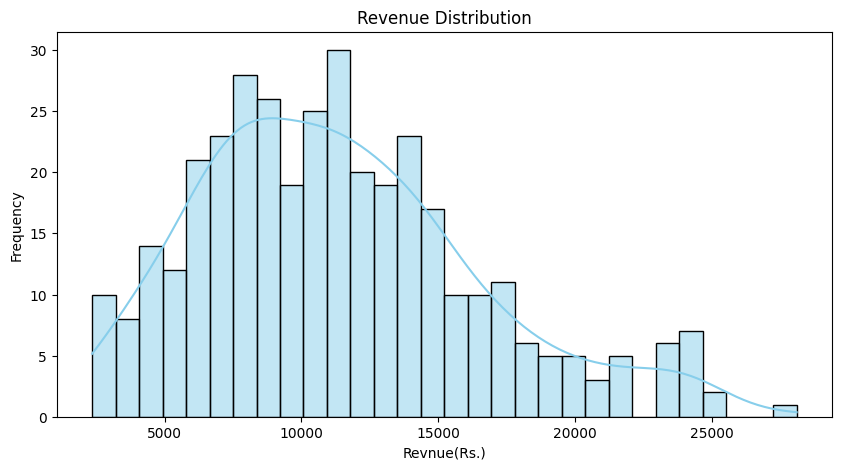

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['Revnue(Rs.)'], bins=30, kde=True, color='skyblue')
plt.xlabel('Revnue(Rs.)')
plt.ylabel('Frequency')
plt.title('Revenue Distribution')
plt.show()

In [12]:
# The distribution is right-skewed (positively skewed), meaning that most days have lower to mid-range revenue, while a few days have very high revenue (above ₹20,000).
# The peak (mode) appears around ₹8,000 - ₹12,000, which means most days fall in this revenue range.

# Revenue fluctuates significantly, as seen from the spread of the histogram.
# Some days have revenue as low as ₹2,500, while some reach as high as ₹28,000, confirming a high variance.

# The tail on the right (values above ₹20,000) represents a few high-revenue days.

# The left part (below ₹5,000) shows a small number of low-revenue days.

In [13]:
df[df['Revnue(Rs.)']>25000]

,Date,Revnue(Rs.)
325,2024-08-21,25199.29
358,2024-09-23,28093.25


In [14]:
df[df['Revnue(Rs.)']<3000]

,Date,Revnue(Rs.)
42,2023-11-12,2423.46
70,2023-12-10,2655.99
112,2024-01-21,2472.10
117,2024-01-26,2692.50
126,2024-02-04,2562.40
147,2024-02-25,2806.88
175,2024-03-24,2353.46
210,2024-04-28,2899.20


In [16]:
df[df['Revnue(Rs.)']<4000]

,Date,Revnue(Rs.)
42,2023-11-12,2423.46
56,2023-11-26,3984.88
63,2023-12-03,3890.65
70,2023-12-10,2655.99
84,2023-12-24,3664.85
85,2023-12-25,3003.48
105,2024-01-14,3707.91
112,2024-01-21,2472.10
113,2024-01-22,3876.13
117,2024-01-26,2692.50


In [15]:
df[df['Revnue(Rs.)']<5000]

,Date,Revnue(Rs.)
35,2023-11-05,4376.77
42,2023-11-12,2423.46
49,2023-11-19,4704.24
56,2023-11-26,3984.88
59,2023-11-29,4758.31
63,2023-12-03,3890.65
70,2023-12-10,2655.99
77,2023-12-17,4182.42
84,2023-12-24,3664.85
85,2023-12-25,3003.48


In [16]:
# The number of bins controls how detailed the histogram is:
# Too Few Bins (e.g., 10-15) → Oversimplifies the data, making trends harder to see.
# Too Many Bins (e.g., 50-100) → Creates too much noise, making patterns unclear.
# Optimal Choice (30 bins) → Gives a balanced view with enough detail but without too much noise.

In [17]:
df[df['Revnue(Rs.)'] > 20000]

,Date,Revnue(Rs.)
246,2024-06-03,21010.30
253,2024-06-10,20026.46
324,2024-08-20,24872.79
325,2024-08-21,25199.29
326,2024-08-22,23823.99
327,2024-08-23,23885.14
328,2024-08-24,21130.06
332,2024-08-28,20208.02
334,2024-08-30,21845.00
337,2024-09-02,21411.00


In [18]:
df[df['Revnue(Rs.)'] < 5000]

,Date,Revnue(Rs.)
35,2023-11-05,4376.77
42,2023-11-12,2423.46
49,2023-11-19,4704.24
56,2023-11-26,3984.88
59,2023-11-29,4758.31
63,2023-12-03,3890.65
70,2023-12-10,2655.99
77,2023-12-17,4182.42
84,2023-12-24,3664.85
85,2023-12-25,3003.48


In [19]:
df[df['Revnue(Rs.)'] < 6000]

,Date,Revnue(Rs.)
23,2023-10-24,5660.40
35,2023-11-05,4376.77
41,2023-11-11,5937.06
42,2023-11-12,2423.46
49,2023-11-19,4704.24
56,2023-11-26,3984.88
59,2023-11-29,4758.31
63,2023-12-03,3890.65
70,2023-12-10,2655.99
73,2023-12-13,5899.75


In [20]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df.groupby('DayOfWeek')['Revnue(Rs.)'].mean().sort_values()

DayOfWeek
Sunday        6062.917925
Thursday     11570.339808
Friday       11994.889038
Wednesday    12092.938846
Saturday     12282.680000
Tuesday      12345.287885
Monday       13149.365849
Name: Revnue(Rs.), dtype: float64

In [21]:
# Sunday has the lowest average revenue (~6062 Rs.)
# Monday has the highest average revenue (~13149 Rs.)
# Weekdays (Monday to Friday) have relatively higher revenues than weekends (Saturday and Sunday).

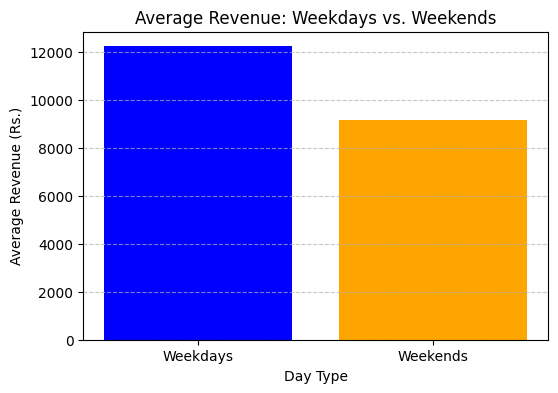

In [22]:
# Extract weekday (0 = Monday, 6 = Sunday)
df['Weekday'] = df['Date'].dt.dayofweek

# Separate Weekday (0-4) and Weekend (5-6) revenue
weekday_revenue = df[df['Weekday'] < 5]['Revnue(Rs.)'].mean()
weekend_revenue = df[df['Weekday'] >= 5]['Revnue(Rs.)'].mean()

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(["Weekdays", "Weekends"], [weekday_revenue, weekend_revenue], color=['blue', 'orange'])

# Labels
plt.xlabel("Day Type")
plt.ylabel("Average Revenue (Rs.)")
plt.title("Average Revenue: Weekdays vs. Weekends")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

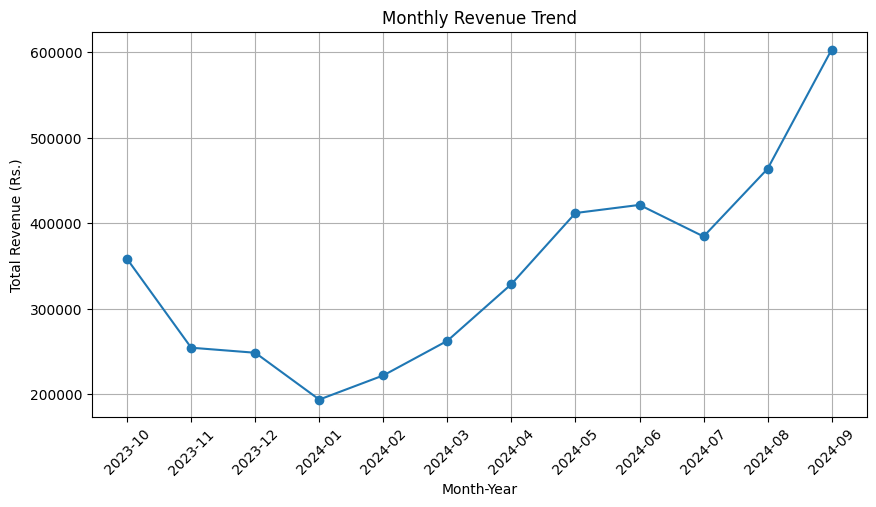

In [23]:
df['YearMonth'] = df['Date'].dt.to_period('M')  # Extract Year-Month
df_monthly = df.groupby('YearMonth')['Revnue(Rs.)'].sum().reset_index()

# Plot the monthly trend
plt.figure(figsize=(10,5))
plt.plot(df_monthly['YearMonth'].astype(str), df_monthly['Revnue(Rs.)'], marker='o', linestyle='-')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue (Rs.)')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [24]:
# Revenue steadily decreased from October 2023 to January 2024, hitting the lowest point in January 2024.
# From February 2024, revenue started recovering gradually.
# After a steady increase till June 2024, there is a slight dip in July 2024 before it rises again in August and September.
# Revenue surged significantly in August & September 2024.

In [25]:
# November 2023 saw a sharp drop of nearly -30% (biggest decline).
# January 2024 also had a decline of around -20%, indicating weak sales during these months.

# Continuous positive growth with peaks in April & May 2024 (~25% growth).
# Indicates successful business strategies, new marketing efforts, or seasonal demand.

# A small dip in July (~ -5%), but August and September saw high recovery (~30%).